In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
from scipy import stats
from numpy import linalg as LA


In [2]:
####  Generate Data
def sample_data(mu, sigma,N):
    p_x = stats.multivariate_normal(mean=mu, cov=sigma)
    return p_x.rvs(size=N, random_state=20)

mu = np.array([0.75, -0.75])
sigma = np.array([[0.15, 0], [0, 0.15]])
x = sample_data(mu, sigma, 300).T
x1, x2 = x

mu = np.array([-1, 0])
x = sample_data(mu, sigma, 300).T
x3, x4 = x

mu = np.array([0, 1])
x = sample_data(mu, sigma, 300).T
x5, x6 = x

In [3]:
### Create P, Graph with Gaussian weights
X1 = np.concatenate((x1,x3,x5))
X2 = np.concatenate((x2,x4,x6))
eps = 0.7
k=np.zeros((len(X1),len(X2)))
for i in range(len(X1)):
    for j in range(len(X1)):
        k[i,j] = np.exp(-((X1[i]-X1[j])**2 + (X2[i]-X2[j])**2 )/eps)
P = k
d=np.zeros((len(X1)))
for i in range(len(X1)):
    d[i] = np.sum(k[i,:])
    P[i,:] = P[i,:]/d[i]
### Create random walk on data
# compute powers of P
P_int = [P]
temp = P
for t in range(0,64):
    temp = np.matmul(temp,temp)
    P_int.append(temp)

y1 = np.linspace(0,899,900)
y2 = np.linspace(0,899,900)
Y1,Y2 = np.meshgrid(y1,y2)

<IPython.core.display.Javascript object>


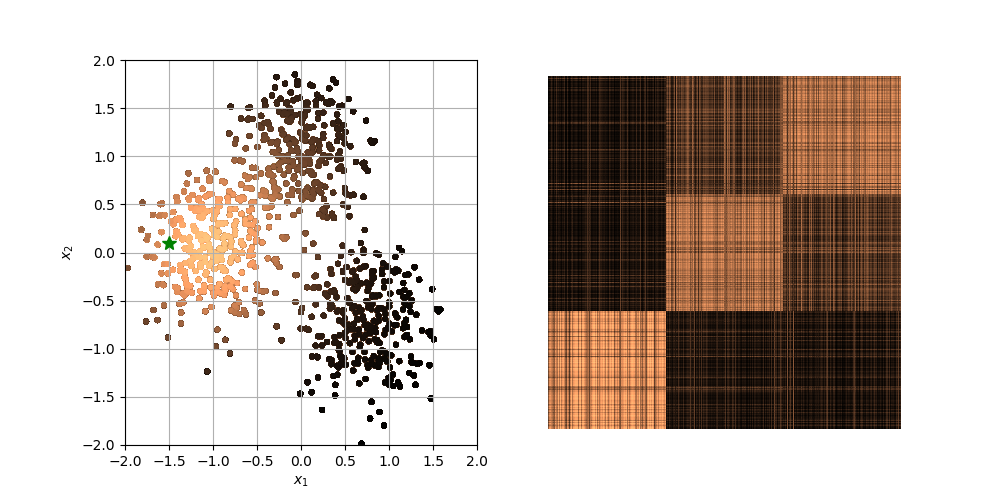

In [4]:
### Animation of random walk
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 5))
ax1.plot(X1[307], X2[307], 'g*',markersize=10)
ax1.axis([-2, 2, -2, 2])
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')
ax1.grid()

def run(i):
    ax1.scatter(X1, X2, c=P_int[i][307,:],s=10, marker = 'o',lw=1, alpha=1, cmap = cm.copper)
    ax1.figure.canvas.draw()
    ax2.matshow(P_int[i],cmap=cm.copper,origin="lower")
    ax2.figure.canvas.draw()

ani = animation.FuncAnimation(fig, run, frames = 8,interval=500, blit=True)
plt.show()

In [5]:
### Run Markov chain forward for values in t
# t = [2, 8, 64]
# y1 = np.linspace(0,899,900)
# y2 = np.linspace(0,899,900)
# Y1,Y2 = np.meshgrid(y1,y2)
# fig, ax = plt.subplots(3,2)
# for i in range(len(t)):
#     P_int = LA.matrix_power(P,t[i])
#     ax[i,0].scatter(X1,X2,s=10,c=P_int[307,:], marker = 'o',lw=1, alpha=1, cmap = cm.copper )
#     ax[i,0].plot(X1[307], X2[307], 'g*')
#     #ax[i,0].axis([-3, 3, -3, 3])
#     ax[i,0].set_xlabel(r'$x_1$')
#     ax[i,0].set_ylabel(r'$x_2$')
# for i in range(len(t)):
#     P_int = LA.matrix_power(P, t[i])
#     ax[i, 1].scatter(Y1, Y2, s=10, c=P_int, marker='o', lw=0.1, alpha=0.1, cmap=cm.copper)
# fig.tight_layout()
# plt.show()


In [6]:
# # Compute index of accuracy delta
# delta = 0.1
# s = 1
# while np.abs(w[s]) > delta*np.abs(w[1]):
#     s = s + 1